#Analysis Notebook: Palm Oil Profitability in Nigerian States (2020–2025)
 Columns: Area, Yield, Market Price, Variable Cost, Establishment Cost, Fixed Annual Cost
 Calculations: Revenue, Total Cost, Profit, ROI, Payback, Break-even, Total Investment for ₦1B profit


# Import necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load your dataset
df = pd.read_csv(r"C:\Users\HomePC\Downloads\Raw datasets + source list  - Copy of Sheet1.csv")
df.head()


,Company,State,Year,Total plantation Area (ha),Total Production (tons/yr),Yield (tons/ha),Market_Price_N_per_ton,Variable_Cost_N_per_ha,Establishment_Cost_N_per_ha,Fixed_Annual_Cost_N_per_ha,Data Source
0,Presco Plc,Edo,2020,"36,932","45,489",1.15,"1,200,000","320,000","1,050,000","160,000",Presco's 2020 Annual report
1,Presco Plc,Edo,2021,"36,932","53,775",1.36,"1,300,000","360,000","1,150,000","165,000",NaN
2,Presco Plc,Edo,2022,"37,007","68,998",1.74,"1,450,000","400,000","1,250,000","170,000",NaN
3,Presco Plc,Edo,2023,"46,468","62,500",1.27,"1,700,000","440,000","1,350,000","175,000",NaN
4,Presco Plc,Edo,2024,"46,468","31,064",0.63,"2,185,000","480,000","1,450,000","180,200",NaN


In [ ]:
cols = ['Yield (tons/ha)', 'Market_Price_N_per_ton', 'Variable_Cost_N_per_ha',
        'Fixed_Annual_Cost_N_per_ha', 'Establishment_Cost_N_per_ha', 'Total plantation Area (ha)']

for col in cols:
    # remove commas and convert to float
    df[col] = df[col].astype(str).str.replace(',', '').astype(float)


# Calculations

In [ ]:
# Revenue per ha
df['Revenue_N_per_ha'] = df['Yield (tons/ha)'] * df['Market_Price_N_per_ton']

# Total Annual Cost per ha
df['Total_Annual_Cost_N_per_ha'] = df['Variable_Cost_N_per_ha'] + df['Fixed_Annual_Cost_N_per_ha'] + df['Establishment_Cost_N_per_ha']

# Profit per ha
df['Profit_N_per_ha'] = df['Revenue_N_per_ha'] - df['Total_Annual_Cost_N_per_ha']

# ROI (%)
df['ROI_percent'] = (df['Profit_N_per_ha'] / df['Total_Annual_Cost_N_per_ha']) * 100

# Payback period (years)
df['Payback_years'] = df['Total_Annual_Cost_N_per_ha'] / df['Profit_N_per_ha']

# Break-even plantation area for ₦1B profit
df['Break_even_ha_for_1B'] = 1_000_000_000 / df['Profit_N_per_ha']

# Total Investment for ₦1B profit
df['Total_Investment_for_1B_N'] = df['Break_even_ha_for_1B'] * df['Total_Annual_Cost_N_per_ha']


In [ ]:
df.head()

,Company,State,Year,Total plantation Area (ha),Total Production (tons/yr),Yield (tons/ha),Market_Price_N_per_ton,Variable_Cost_N_per_ha,Establishment_Cost_N_per_ha,Fixed_Annual_Cost_N_per_ha,Data Source,Revenue_N_per_ha,Total_Annual_Cost_N_per_ha,Profit_N_per_ha,ROI_percent,Payback_years,Break_even_ha_for_1B,Total_Investment_for_1B_N
0,Presco Plc,Edo,2020,36932.0,"45,489",1.15,1200000.0,320000.0,1050000.0,160000.0,Presco's 2020 Annual report,1380000.0,1530000.0,-150000.0,-9.803922,-10.200000,-6666.666667,-1.020000e+10
1,Presco Plc,Edo,2021,36932.0,"53,775",1.36,1300000.0,360000.0,1150000.0,165000.0,NaN,1768000.0,1675000.0,93000.0,5.552239,18.010753,10752.688172,1.801075e+10
2,Presco Plc,Edo,2022,37007.0,"68,998",1.74,1450000.0,400000.0,1250000.0,170000.0,NaN,2523000.0,1820000.0,703000.0,38.626374,2.588905,1422.475107,2.588905e+09
3,Presco Plc,Edo,2023,46468.0,"62,500",1.27,1700000.0,440000.0,1350000.0,175000.0,NaN,2159000.0,1965000.0,194000.0,9.872774,10.128866,5154.639175,1.012887e+10
4,Presco Plc,Edo,2024,46468.0,"31,064",0.63,2185000.0,480000.0,1450000.0,180200.0,NaN,1376550.0,2110200.0,-733650.0,-34.766847,-2.876303,-1363.047775,-2.876303e+09


# Quick Visualizations


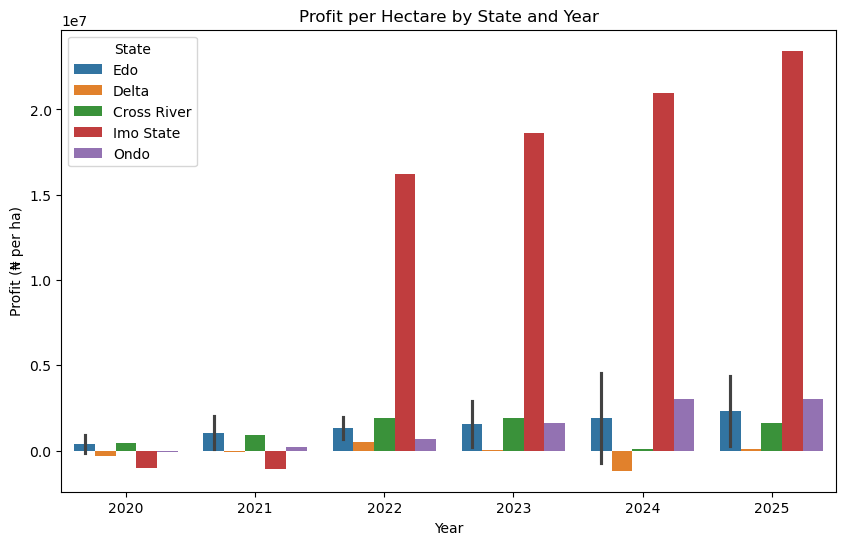

In [ ]:

plt.figure(figsize=(10,6))
sns.barplot(x='Year', y='Profit_N_per_ha', hue='State', data=df)
plt.title('Profit per Hectare by State and Year')
plt.ylabel('Profit (₦ per ha)')
plt.xlabel('Year')
plt.legend(title='State')
plt.show()

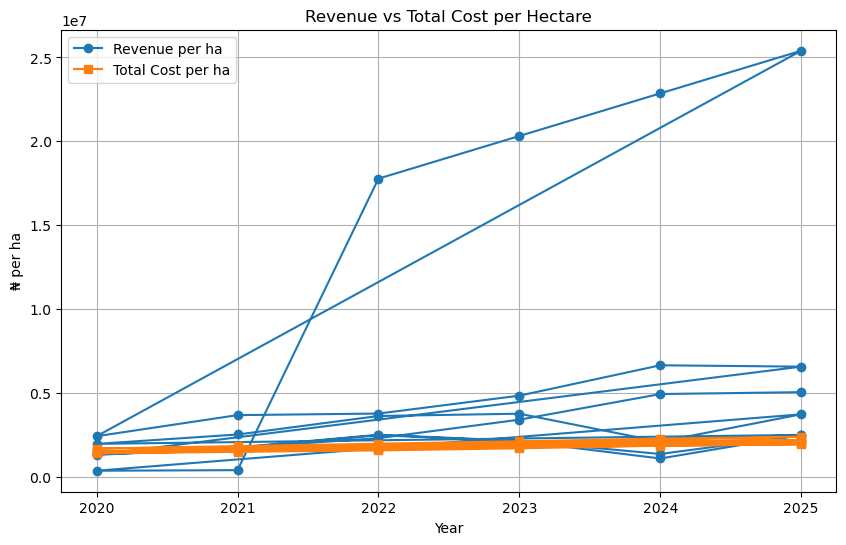

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(df['Year'], df['Revenue_N_per_ha'], marker='o', label='Revenue per ha')
plt.plot(df['Year'], df['Total_Annual_Cost_N_per_ha'], marker='s', label='Total Cost per ha')
plt.title('Revenue vs Total Cost per Hectare')
plt.xlabel('Year')
plt.ylabel('₦ per ha')
plt.legend()
plt.grid(True)
plt.show()

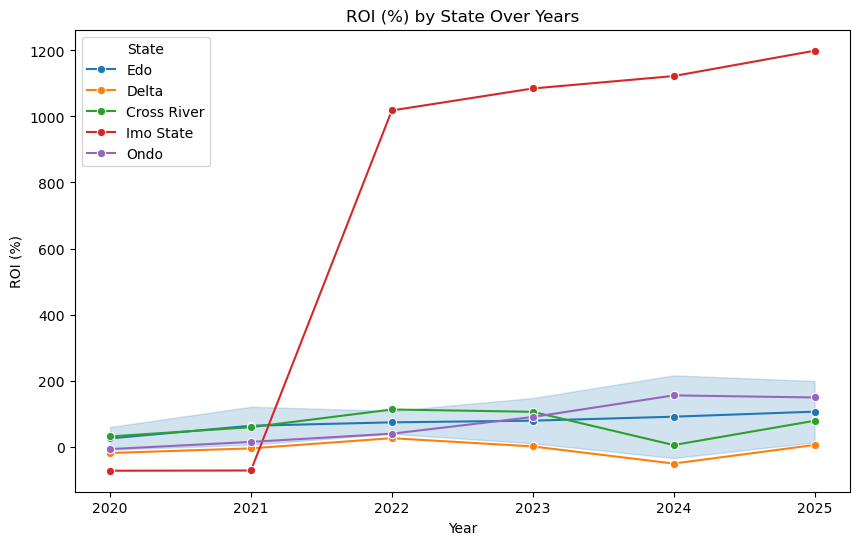

In [ ]:
#ROI over Years

plt.figure(figsize=(10,6))
sns.lineplot(x='Year', y='ROI_percent', hue='State', data=df, marker='o')
plt.title('ROI (%) by State Over Years')
plt.ylabel('ROI (%)')
plt.xlabel('Year')
plt.show()

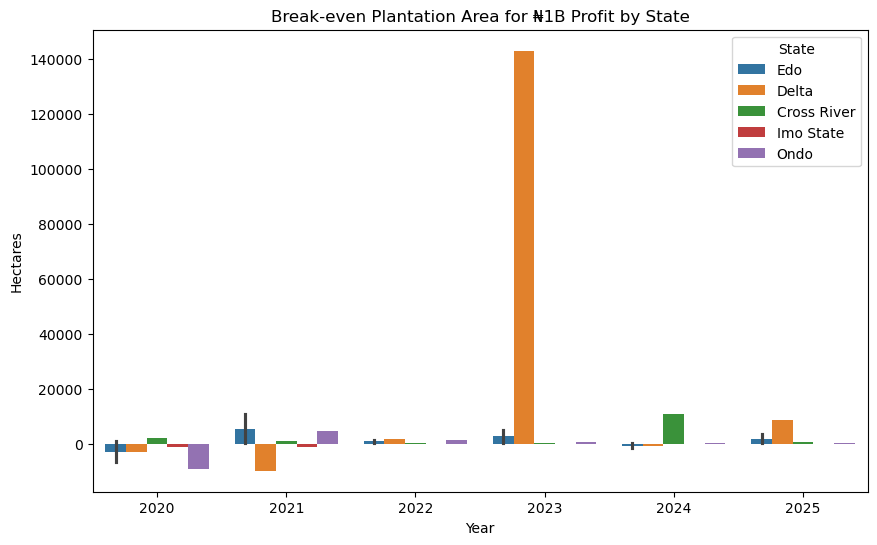

In [ ]:
# Break-even Area for ₦1B Profit

plt.figure(figsize=(10,6))
sns.barplot(x='Year', y='Break_even_ha_for_1B', hue='State', data=df)
plt.title('Break-even Plantation Area for ₦1B Profit by State')
plt.ylabel('Hectares')
plt.xlabel('Year')
plt.show()

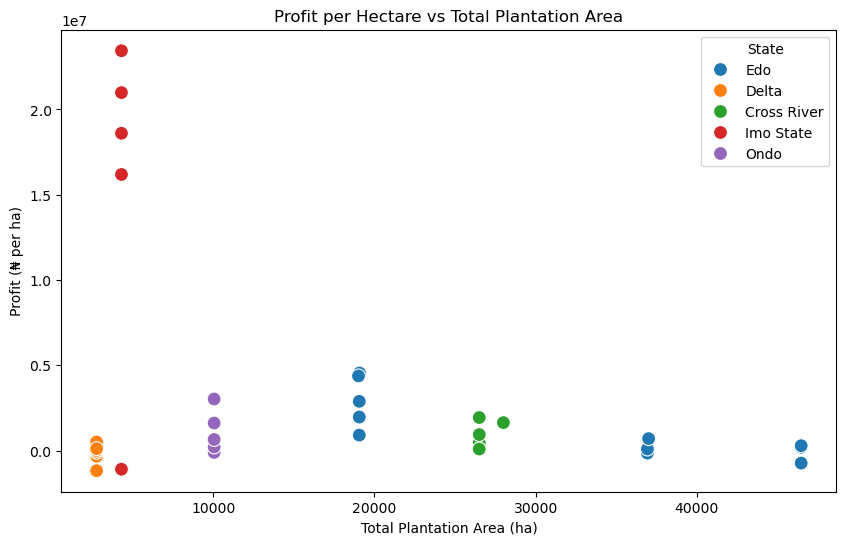

In [ ]:
# Profit vs Total Plantation Area

plt.figure(figsize=(10,6))
sns.scatterplot(x='Total plantation Area (ha)', y='Profit_N_per_ha', hue='State', data=df, s=100)
plt.title('Profit per Hectare vs Total Plantation Area')
plt.ylabel('Profit (₦ per ha)')
plt.xlabel('Total Plantation Area (ha)')
plt.show()

In [ ]:
# Save to CSV
df.to_csv('Palm_Oil_Profitability_Analysis.csv', index=False)

# MODELLING 3 Scenarios: Conservative, Base, Optimistic

In [ ]:
import pandas as pd

# Load your dataset again
df = pd.read_csv(r"C:\Users\HomePC\Downloads\Raw datasets + source list  - Copy of Sheet1.csv")


cols = ['Yield (tons/ha)', 'Market_Price_N_per_ton', 'Variable_Cost_N_per_ha',
        'Fixed_Annual_Cost_N_per_ha', 'Establishment_Cost_N_per_ha', 'Total plantation Area (ha)']

for col in cols:
    df[col] = df[col].astype(str).str.replace(',', '').astype(float)


Scenario Summary:


,Scenario,Average_Revenue_per_ha,Average_Profit_per_ha,Average_ROI_percent,Average_Payback_years
0,Conservative,3933390.375,2.049865e+06,109.456427,-2.513544
1,Base,4856037.500,3.016443e+06,164.754575,10.066719
2,Optimistic,5875805.375,4.080141e+06,228.180916,-25.445023


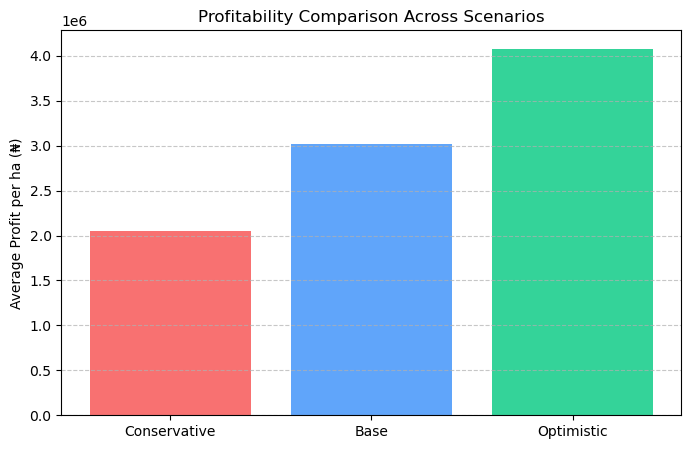

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Base scenario: your actual data
base = df.copy()

# Conservative scenario (↓ Price, ↓ Yield, ↑ Cost)
conservative = df.copy()
conservative['Market_Price_N_per_ton'] *= 0.9   # 10% lower market price
conservative['Yield (tons/ha)'] *= 0.9          # 10% lower yield
conservative['Variable_Cost_N_per_ha'] *= 1.1   # 10% higher variable cost

# Optimistic scenario (↑ Price, ↑ Yield, ↓ Cost)
optimistic = df.copy()
optimistic['Market_Price_N_per_ton'] *= 1.1     # 10% higher market price
optimistic['Yield (tons/ha)'] *= 1.1            # 10% higher yield
optimistic['Variable_Cost_N_per_ha'] *= 0.9     # 10% lower variable cost

# --- RECALCULATE PROFIT METRICS FOR EACH SCENARIO ---
for scenario in [base, conservative, optimistic]:
    scenario['Revenue_N_per_ha'] = scenario['Yield (tons/ha)'] * scenario['Market_Price_N_per_ton']
    scenario['Total_Annual_Cost_N_per_ha'] = (
        scenario['Variable_Cost_N_per_ha']
        + scenario['Fixed_Annual_Cost_N_per_ha']
        + scenario['Establishment_Cost_N_per_ha']
    )
    scenario['Profit_N_per_ha'] = scenario['Revenue_N_per_ha'] - scenario['Total_Annual_Cost_N_per_ha']
    scenario['ROI_percent'] = (scenario['Profit_N_per_ha'] / scenario['Total_Annual_Cost_N_per_ha']) * 100
    scenario['Payback_years'] = scenario['Total_Annual_Cost_N_per_ha'] / scenario['Profit_N_per_ha']

# --- COMBINE SCENARIOS FOR COMPARISON ---
summary = pd.DataFrame({
    'Scenario': ['Conservative', 'Base', 'Optimistic'],
    'Average_Revenue_per_ha': [
        conservative['Revenue_N_per_ha'].mean(),
        base['Revenue_N_per_ha'].mean(),
        optimistic['Revenue_N_per_ha'].mean()
    ],
    'Average_Profit_per_ha': [
        conservative['Profit_N_per_ha'].mean(),
        base['Profit_N_per_ha'].mean(),
        optimistic['Profit_N_per_ha'].mean()
    ],
    'Average_ROI_percent': [
        conservative['ROI_percent'].mean(),
        base['ROI_percent'].mean(),
        optimistic['ROI_percent'].mean()
    ],
    'Average_Payback_years': [
        conservative['Payback_years'].mean(),
        base['Payback_years'].mean(),
        optimistic['Payback_years'].mean()
    ]
})

print("Scenario Summary:")
display(summary)

# --- VISUALIZE PROFITS UNDER DIFFERENT SCENARIOS ---
plt.figure(figsize=(8,5))
plt.bar(summary['Scenario'], summary['Average_Profit_per_ha'], color=['#f87171', '#60a5fa', '#34d399'])
plt.ylabel('Average Profit per ha (₦)')
plt.title('Profitability Comparison Across Scenarios')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# STATE COMPARISON ANALYSIS

In [ ]:
import pandas as pd

df = pd.read_csv(r"C:\Users\HomePC\Downloads\Cleaned_merged dataset..csv - Palm_Oil_Profitability_Analysis.csv")


In [ ]:
print(df.columns.tolist())


['Company', 'State', 'Year', 'Total plantation Area (ha)', 'Total Production (tons/yr)', 'Yield (tons/ha)', 'Market_Price_N_per_ton', 'Variable_Cost_N_per_ha', 'Establishment_Cost_N_per_ha', 'Fixed_Annual_Cost_N_per_ha', 'Revenue_N_per_ha', 'Total_Annual_Cost_N_per_ha', 'Profit_N_per_ha', 'ROI_percent', 'Payback_years', 'Break_even_ha_for_1B', 'Total_Investment_for_1B_N', 'Data Source']


In [ ]:

# Filter dataset for the selected states
states_to_compare = ['Edo', 'Ondo', 'Cross River']
state_df = df[df['State'].isin(states_to_compare)]


In [ ]:
# Compute average metrics per state

state_summary = state_df.groupby('State').agg({
    'Profit_N_per_ha': 'mean',
    'Total_Investment_for_1B_N': 'mean',
    'ROI_percent': 'mean',
    'Revenue_N_per_ha': 'mean',
    'Total_Annual_Cost_N_per_ha': 'mean',
    'Yield (tons/ha)': 'mean'
}).reset_index()

# Rank states by average profit per ha (highest = rank 1)
state_summary['Profit_Rank'] = state_summary['Profit_N_per_ha'].rank(ascending=False)

state_summary


,State,Profit_N_per_ha,Total_Investment_for_1B_N,ROI_percent,Revenue_N_per_ha,Total_Annual_Cost_N_per_ha,Yield (tons/ha),Profit_Rank
0,Cross River,1.165417e+06,5.040579e+09,64.871410,2.962917e+06,1.797500e+06,1.958333,3.0
1,Edo,1.424262e+06,2.538021e+09,72.578316,3.308462e+06,1.884200e+06,2.036667,1.0
2,Ondo,1.400333e+06,-1.426165e+08,73.059783,3.136167e+06,1.735833e+06,1.700000,2.0
